# **Análisis y Reporte sobre el desempeño del modelo**

Francisco Mestizo Hernández A01731549

## **Instrucciones**

Escoge una de las 2 implementaciones que tengas y genera un análisis sobre su desempeño en un set de datos. Este análisis lo deberás documentar en un reporte con indicadores claros y gráficas comparativas que respalden tu análisis.

El análisis debe de contener los siguientes elementos:
* Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
* Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
* Diagnóstico y explicación el grado de varianza: bajo medio alto
* Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

Basándote en lo encontrado en tu análisis utiliza técnicas de regularización o ajuste de parámetros para mejorar el desempeño de tu modelo y documenta en tu reporte cómo mejoró este.

## **Set de datos**

Primero, comenzamos cargando el set de datos que utilizaremos para el modelo.

En este caso serán los datos de **iris**. Este set de datos se puede encontrar en este link:

https://github.com/FranciscoMest02/TC3006/tree/main/retro/M2_ML/Momento%20de%20Retroalimentacion%203%3A%20Analisis%20del%20modelo/data

El set de datos consta de 150 registros, para tres clases diferentes de iris:
* Iris setosa
* Iris versicolor
* Iris virginica

Las variables independientes son el sepal length, sepal width, petal length, pedal width. Todas estas variables son numéricas y estan medidas en centímetros.

Debido a que en el set de datos se listan tres clases, entonces el problema que resolveremos será de clasificación de esas clases dependiendo de las caracteristicas de las plantas.

Comenzamos cargando los datos y haciendo la separación de estos en 20% para training, 40% para validation y 40% para testing.

In [72]:
#Cargamos los archivos
from google.colab import drive  # importa libreria
drive.mount("/content/gdrive")  # utiliza comando

!pwd

#put your own path in google drive
%cd '/content/gdrive/MyDrive/Tec/ColabAI/iris/'
!ls

import pandas as pd # importar libreria

columns = ["sepal length","sepal width","petal length","petal width", "class"] # definir nombres de columna manualmente
df = pd.read_csv('iris.data', names=columns) # abrir el archivo de datos con los nombres dados para las columnas
df = df.sample(frac = 1) #Desordenamos los datos porque vienen por clase
df.head() # mostrar las primeras líneas del dataset que se cargó

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Tec/ColabAI/iris
/content/gdrive/MyDrive/Tec/ColabAI/iris
iris.data  iris.names


,sepal length,sepal width,petal length,petal width,class
3,4.6,3.1,1.5,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
75,6.6,3.0,4.4,1.4,Iris-versicolor
0,5.1,3.5,1.4,0.2,Iris-setosa
134,6.1,2.6,5.6,1.4,Iris-virginica


In [73]:
from sklearn.model_selection import train_test_split #importamos la funcion para hacer split de los datos

#dividimos en la variable dependiente y las independientes
X = df.drop("class", axis=1)
y = df["class"]

## **Creación de los modelos**
*Correcion: Cambio en las metricas*

Para la actividad se usará un arbol de decisión, ya que estamos tratando de clasificar los datos de las iris. El modelo tendrá una desición de entropía como lo hicimos en la clase, una profundidad máxima de tres, ya que es un árbol que no será muy grande y un parámetro de sqrt para max_features.

A continuación se muestra ese modelo y lo vamos a entrenar con diferentes cantidades de datos para ver como mejora. El set de datos de entrenamiento ira del 5% al 40% y se usará el **accuracy** y **recall** para comparar los modelos.

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

  # Creamos el objeto de DecisionTreeClassifier

recall = []
precision = []
trees = {}

# Entrenamos el modelo con los datos
for i in range(60,95,1):
  myTree = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter="best", max_features="sqrt")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
  myTree.fit(X_train, y_train)
  trees[100-i] = myTree

  y_pred = myTree.predict(X_val)
  report = classification_report(y_val, y_pred, output_dict=True)
  recall.append(report['weighted avg']['recall'])
  precision.append(report['weighted avg']['precision'])

Después de realizar el entrenamiento de los modelos, se guardo el recall y accuracy que generó cada uno. Estos dos datos los graficaremos a continuación, para ver si al aumentar la cantidad de datos de entrenamiento incrementan las métricas. Es importante mencionar que cada vez que se corre el código se ven gráficas diferentes, pero el comportamiento tiende a ser similar. Esto se debe a que el árbol tratará de hacer overfitting a los datos que reciba, por lo tanto los resultados varian mucho conforme a como se separen los datos en cada iteración.

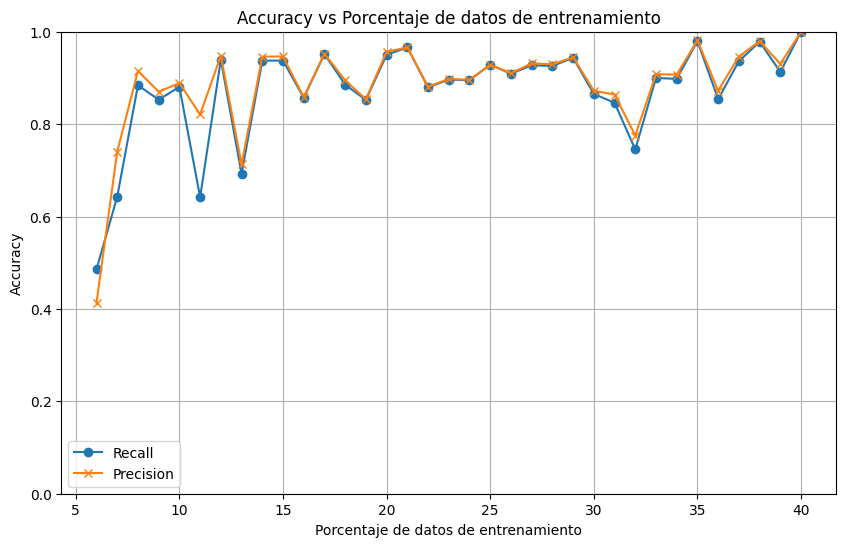

In [75]:
import matplotlib.pyplot as plt

# Listas de valores
x_values = list(range(40, 5, -1))
y_recall = recall
y_precision = precision

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_recall, marker='o', label='Recall')
plt.plot(x_values, y_precision, marker='x', label='Precision')

# Etiquetas y título
plt.xlabel('Porcentaje de datos de entrenamiento')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Porcentaje de datos de entrenamiento')

# Leyenda
plt.legend()

# Establecer límites en el eje y para que vaya de 0 a 1
plt.ylim(0, 1)

# Mostrar el gráfico
plt.grid(True)
plt.show()


De esta gráfica podemso análizar la **varianza**. Se puede ver que conforme el set de entrenamiento es más grande, la diferencia en las metricas para los árboles es muy pequeña. Esto quiere decir que como lo estemos entrenando con datos aleatorios, sigue teniendo metricas parecidas (no varian). Por lo tanto, tiene una **varianza baja**

Por otro lado, al principio de la gráfica podemos ver que hay arboles que tienen picos muy drasticos en las métricas. Esto nos podería decir que son modelos que sufren de **overfitting**. Al tener tan pocos datos, no sabe diferenciar correctamente las clases. Esto pasa porque los arboles de decision tratan de ajustarse siempre a los datos que reciben en el entrenamiento.

Es por esto que nos convien tomar alguno de los árboles que estén más a la derecha del 32%. Estos árboles son estables, por lo que generalizan bien. Tampoco tienen **underfitting** porque los resultados de las dos métricas son altos.

Por otro lado, para analizar el **sesgo** podemos fijarnos en la matriz de confusión. A continuación se grafica una matriz de confusión para el árbol que tuvo el 40% de datos de entrenamiento y uno que tuvo el 6%.

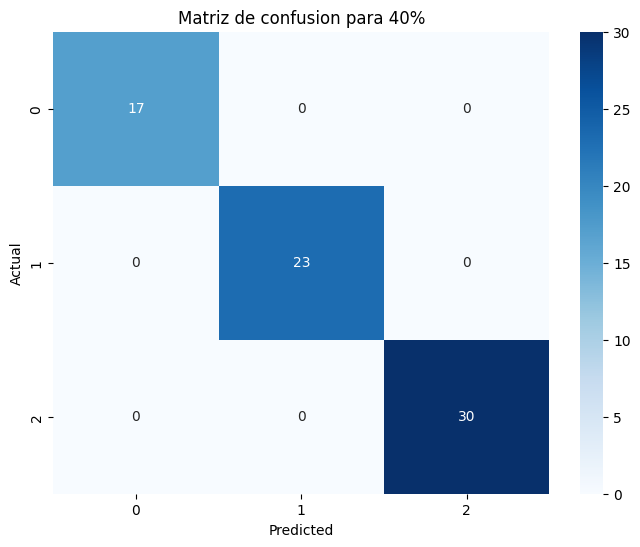

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

myTree = trees[40] #Seleccionamos el arbol en el
y_pred = myTree.predict(X_val)

# Creamos la matriz de confusion
conf_matrix_train = confusion_matrix(y_val, y_pred)

# Mostramos la matriz de confusión en un heat map
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de confusion para 40%")
plt.show()

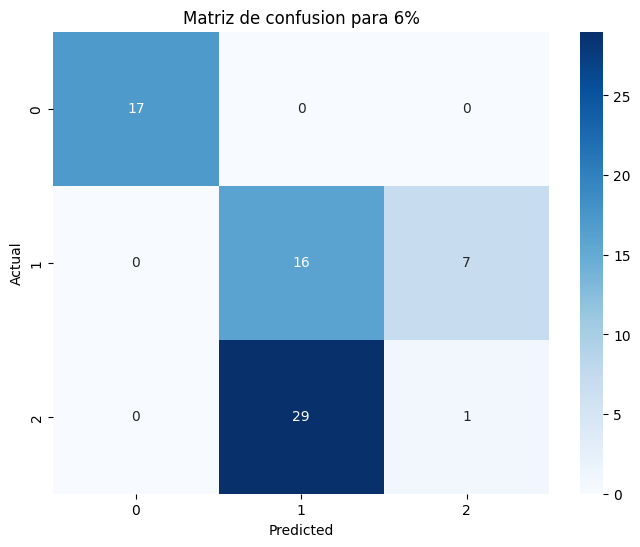

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

myTree = trees[6] #Seleccionamos el arbol en el
y_pred = myTree.predict(X_val)

# Creamos la matriz de confusion
conf_matrix_train = confusion_matrix(y_val, y_pred)

# Mostramos la matriz de confusión en un heat map
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de confusion para 6%")
plt.show()

Aquí podemos ver que cuando usamos muy pocos datos el modelo tiende a confundir muy fácilmente la clase uno y dos. Esto quiere decir que tiene un sesgo alto. Esto no ocurre en el árbol obtenido con el 40% de datos de entrenamiento, ya que sabe identificar correctamente cada una de las clases, por lo que tiene un **sesgo bajo**

## **Regularización**
*Correciones: Se agrego esta seccion*


Ahora que sabemos que aproxiamdamente en el 40% de datos de entrenamiento obtenemos un buen resultado, podemos usar regularización para refinarlo. En el caso de los árboles, una técnica que se puede hacer es cortar ramas que no generan información importante para los resultados. Esto se lo que se hace a continuación

In [79]:
myTree = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter="best", max_features="sqrt")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

pruningData = myTree.cost_complexity_pruning_path(X_train, y_train)
alphaValues = pruningData.ccp_alphas
impurityValues = pruningData.impurities


Generaremos una lista con diferentes alphas para ver cual es el mejor valor y escogeremos ese árbol

In [80]:
allTrees = []

for thisAlpha in alphaValues:
  myTree = DecisionTreeClassifier(criterion="entropy", max_depth=3, splitter="best", max_features="sqrt")
  myTree.fit(X_train, y_train)
  allTrees.append(myTree)

allTrainScores = []
allValScores = []
for thisTree in allTrees:
  allTrainScores.append(thisTree.score(X_train, y_train))
  allValScores.append(thisTree.score(X_val, y_val))

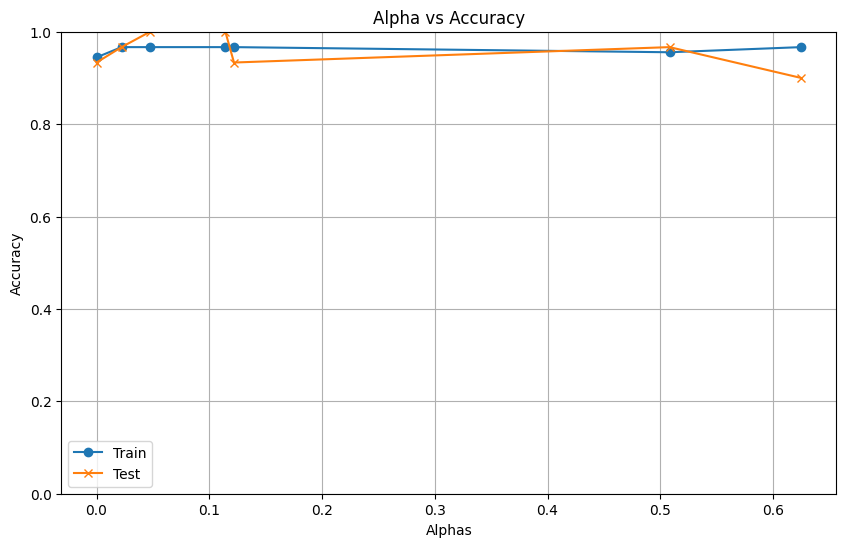

In [81]:
# Listas de valores
x_values = alphaValues
y_train = allTrainScores
y_val = allValScores

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_train, marker='o', label='Train')
plt.plot(x_values, y_val, marker='x', label='Test')

# Etiquetas y título
plt.xlabel('Alphas')
plt.ylabel('Accuracy')
plt.title('Alpha vs Accuracy')

# Leyenda
plt.legend()

# Establecer límites en el eje y para que vaya de 0 a 1
plt.ylim(0, 1)

# Mostrar el gráfico
plt.grid(True)
plt.show()

El mejor alpha es el punto que está un poco despues de 0.5, por lo que haremos el testing con ese árbol.

In [82]:
myTree = allTrees[4]
myTree.score(X_test, y_test)

0.9

Es un buen modelo porque obtenemos un 90% de accuracy para los datos de testing.

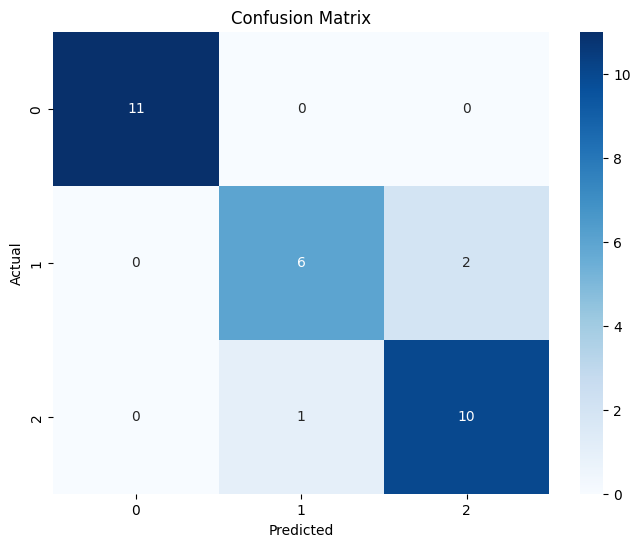

In [84]:
# Creamos la matriz de confusion
conf_matrix_train = confusion_matrix(y_test, y_pred)

# Mostramos la matriz de confusión en un heat map
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Podemos ver que generaliza muy bien las clases aunque a veces confunde las clases 1 y 2. De todas formas, solo clasificó 3 muestras mal del total de 30, por lo que se puede seguir diciendo que tiene un **sesgo bajo**.